# Analysing top N topic labels for top N users

In [1]:
import os
from os.path import join
import eland as ed
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

project_dir = join(os.getcwd(), os.pardir)
models_dir = join(project_dir, 'models')

pd.set_option('display.max_colwidth', -1)

%config InlineBackend.figure_format = 'svg'

In [2]:
TERMS = ['sympathy', 'complaint', 'hope', 'job', 'relief measures', 'compensation',
        'evacuation', 'income', 'ecosystem', 'government', 'corruption', 'news updates', 
        'volunteers', 'donation', 'mobile network', 'housing', 'farm', 'utilities', 
        'water supply', 'power supply', 'food supply', 'medical assistance', 'coronavirus', 
        'petition', 'poverty']

THRESHOLD = 0.7

## Import data from ES

In [3]:
ed_df = ed.DataFrame('localhost', 'twitter', columns=['user_id', 'name', 'description', 'full_text_processed', 'verified', 'location', 'retweet_count', 'followers_count', 'sentiment'])

# defining the full-text query we need: Retrieving records for full_text_processed with the condition is_retweet=False and is_quote_status=False

query_unique = {
    "bool": {
        "must": {
            "term":{"is_retweet":"false"},
        },
        "filter": {
            "term":{"is_quote_status":"false"}
        },
    }
}
# using full-text search capabilities with Eland:
df_ed = ed_df.es_query(query_unique)
df_tweets = df_ed.to_pandas()

In [4]:
#df_tweets = df_tweets.reset_index().rename(columns={'index':'tweet_id'})

In [89]:
df_tweets.head()

,user_id,name,description,full_text_processed,verified,location,retweet_count,followers_count,sentiment
1262961673708675072,1245962651630534656,newspointpn,None,live cyclone amphan map tracking storm’s path,False,None,0,2,0.0000
1262961660932894720,926838660049158144,Vishal Tripathi,Get The Best,nyt live cyclone amphan map tracking storm’s path,False,"Varanasi, India",0,76,0.0000
1262961652359729152,1108690827658711040,MJ News,"News, Media, Smartphone, Tech, Review & More https://www.facebook.com/mobilejudgement/",live news update super cyclone amphan amphanupdate cycloneamphan amphancyclone cycloneamphanupdate 120 km nearly south paradip odisha 200 km southsouthwest digha west bengal 360 km southsouthwest khepupara bangladesh,False,India,0,48,0.5994
1262960808742522880,1108690827658711040,MJ News,"News, Media, Smartphone, Tech, Review & More https://www.facebook.com/mobilejudgement/",cyclone ampan came closer live super cyclone amphan update pradip odisha 120 km orissa digha west bengal 200 km west bengal khepupara bangladesh 360 km bangladesh bangladesh bangla west bengal cyclone amphan,False,India,0,48,0.5994
1262937945214005248,1108690827658711040,MJ News,"News, Media, Smartphone, Tech, Review & More https://www.facebook.com/mobilejudgement/",live news update super cyclone amphan amphanupdate cycloneamphan amphancyclone cycloneamphanupdate 125 km nearly south paradip odisha 225 km southsouthwest digha west bengal 380 km southsouthwest khepupara bangladesh,False,India,0,48,0.5994


## Top N most retweeted users

In [32]:
N = 50
df_tweets.groupby(['user_id', 'name', 'description'])['retweet_count'].agg({'sum'}).nlargest(N, 'sum')

,,,sum
user_id,name,description,
18839785,Narendra Modi,Prime Minister of India,132901
277434037,Ratan N. Tata,"Chairman Emeritus, Tata Sons. Chairman, Tata Trusts",59487
3171712086,Rahul Gandhi,This is the official account of Rahul Gandhi | Member of the Indian National Congress| Member of Parliament,48879
939091,Joe Biden,"Senator, Vice President, 2020 candidate for President of the United States, husband to @DrBiden, proud father & grandfather. Loves ice cream, aviators & @Amtrak",42995
471741741,PMO India,Office of the Prime Minister of India,32204
75246346,Sudhir Chaudhary,"Editor In Chief, Zee News, Zee Business, WION. Hosts India's No.1 News Show DNA every night at 9. Recipient of Ramnath Goenka Award for Hindi Journalism",28343
783214,Twitter,bye,27047
52544275,Ivanka Trump,"Wife, mother, sister, daughter. Advisor to POTUS on job creation + economic empowerment, workforce development & entrepreneurship. Personal Pg. Views are my own",24152
122453931,Imran Khan,Prime Minister of Pakistan,23968


## Aggregating the columns to create a popularity measure

In [124]:
df_users = df_tweets.groupby('user_id').agg({
            'name': lambda x: x.iloc[0],
            'followers_count': lambda x: x.iloc[0],
            'retweet_count': 'sum',
            'sentiment': 'median',
            'verified': lambda x: x.iloc[0],
            'description': lambda x: x.iloc[0],
        })

## Log Normalising the followers and retweet count

In [125]:
df_users['followers_count'] = df_users['followers_count'].apply(lambda x: np.log(x + 1))
df_users['retweet_count'] = df_users['retweet_count'].apply(lambda x: np.log(x + 1))
df_users['verified'] = df_users['verified'].apply(lambda x: int(x) if x==True else 0)

In [126]:
df_users.nlargest(10, ['retweet_count', 'followers_count'])

,name,followers_count,retweet_count,sentiment,verified,description
user_id,,,,,,
18839785,Narendra Modi,17.920659,11.797367,0.64860,1,Prime Minister of India
277434037,Ratan N. Tata,16.022393,10.993530,0.00000,1,"Chairman Emeritus, Tata Sons. Chairman, Tata Trusts"
3171712086,Rahul Gandhi,16.555491,10.797124,0.10600,1,This is the official account of Rahul Gandhi | Member of the Indian National Congress| Member of Parliament
939091,Joe Biden,15.859332,10.668862,0.00000,1,"Senator, Vice President, 2020 candidate for President of the United States, husband to @DrBiden, proud father & grandfather. Loves ice cream, aviators & @Amtrak"
471741741,PMO India,17.446003,10.379877,0.42150,1,Office of the Prime Minister of India
75246346,Sudhir Chaudhary,15.541501,10.252171,-0.39665,1,"Editor In Chief, Zee News, Zee Business, WION. Hosts India's No.1 News Show DNA every night at 9. Recipient of Ramnath Goenka Award for Hindi Journalism"
783214,Twitter,17.881097,10.205368,0.00000,1,bye
52544275,Ivanka Trump,16.038361,10.092164,0.88850,1,"Wife, mother, sister, daughter. Advisor to POTUS on job creation + economic empowerment, workforce development & entrepreneurship. Personal Pg. Views are my own"
122453931,Imran Khan,16.322051,10.084517,-0.12800,1,Prime Minister of Pakistan


## Popularity Measure = Sum of Log Normalised Scores

In [127]:
df_users['popularity'] = df_users['followers_count']+df_users['retweet_count']+df_users['verified']

In [128]:
N = 50
df_users.nlargest(N, 'popularity')[['name', 'description', 'sentiment', 'popularity']]

,name,description,sentiment,popularity
user_id,,,,
18839785,Narendra Modi,Prime Minister of India,0.64860,30.718026
783214,Twitter,bye,0.00000,29.086465
471741741,PMO India,Office of the Prime Minister of India,0.42150,28.825880
101311381,Shah Rukh Khan,None,0.64860,28.552726
759251,CNN,It’s our job to #GoThere & tell the most difficult stories. Join us! For more breaking news updates follow @CNNBRK & download our app http://cnn.com/apps,0.02580,28.378315
3171712086,Rahul Gandhi,This is the official account of Rahul Gandhi | Member of the Indian National Congress| Member of Parliament,0.10600,28.352615
277434037,Ratan N. Tata,"Chairman Emeritus, Tata Sons. Chairman, Tata Trusts",0.00000,28.015922
939091,Joe Biden,"Senator, Vice President, 2020 candidate for President of the United States, husband to @DrBiden, proud father & grandfather. Loves ice cream, aviators & @Amtrak",0.00000,27.528195
807095,The New York Times,News tips? Share them here: http://nyti.ms/2FVHq9v,0.00000,27.520111


## Loading the tweet labels & filtering on a threshold

In [134]:
df_labels = pd.read_json(join(models_dir,'zstc_labels.json'), orient='index', convert_axes=False)

In [135]:
df_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
1264253979002843136,"[relief measures, 0.67]","[complaint, 0.63]","[poverty, 0.48]","[evacuation, 0.46]","[sympathy, 0.44]","[medical assistance, 0.32]","[income, 0.30000000000000004]","[housing, 0.29]","[petition, 0.23]","[corruption, 0.22]",...,"[food supply, 0.07]","[hope, 0.07]","[utilities, 0.05]","[news updates, 0.05]","[coronavirus, 0.04]","[farm, 0.03]","[donation, 0.03]","[volunteers, 0.02]","[government, 0.02]","[job, 0.01]"
1264253959918632960,"[relief measures, 0.5]","[job, 0.06]","[farm, 0.04]","[volunteers, 0.01]","[evacuation, 0.01]","[petition, 0.0]","[complaint, 0.0]","[sympathy, 0.0]","[compensation, 0.0]","[income, 0.0]",...,"[medical assistance, 0.0]","[mobile network, 0.0]","[power supply, 0.0]","[government, 0.0]","[poverty, 0.0]","[housing, 0.0]","[corruption, 0.0]","[food supply, 0.0]","[hope, 0.0]","[water supply, 0.0]"
1264253893632016384,"[government, 0.98]","[hope, 0.97]","[power supply, 0.93]","[sympathy, 0.86]","[ecosystem, 0.77]","[medical assistance, 0.72]","[complaint, 0.6900000000000001]","[relief measures, 0.67]","[petition, 0.5700000000000001]","[income, 0.44]",...,"[evacuation, 0.24]","[housing, 0.21]","[poverty, 0.2]","[job, 0.18]","[farm, 0.16]","[food supply, 0.16]","[coronavirus, 0.12]","[donation, 0.1]","[corruption, 0.08]","[volunteers, 0.0]"
1264253882580045824,"[income, 0.75]","[news updates, 0.35000000000000003]","[sympathy, 0.30000000000000004]","[poverty, 0.22]","[complaint, 0.21]","[job, 0.18]","[corruption, 0.15]","[mobile network, 0.13]","[petition, 0.09]","[evacuation, 0.05]",...,"[ecosystem, 0.02]","[power supply, 0.02]","[relief measures, 0.02]","[government, 0.01]","[volunteers, 0.01]","[donation, 0.0]","[coronavirus, 0.0]","[food supply, 0.0]","[water supply, 0.0]","[medical assistance, 0.0]"
1264253658763612160,"[complaint, 0.9400000000000001]","[relief measures, 0.93]","[petition, 0.88]","[donation, 0.87]","[sympathy, 0.86]","[income, 0.61]","[medical assistance, 0.53]","[evacuation, 0.52]","[news updates, 0.43]","[volunteers, 0.33]",...,"[poverty, 0.04]","[housing, 0.04]","[corruption, 0.02]","[government, 0.02]","[farm, 0.01]","[mobile network, 0.01]","[coronavirus, 0.0]","[food supply, 0.0]","[power supply, 0.0]","[water supply, 0.0]"


In [136]:
def get_labels(tweet, threshold=THRESHOLD):
  topics = []
  for topic in tweet:
    topic_name, value = topic[0], topic[1]
    if value>threshold:
      topics.append((topic_name, np.round(value,2)))
  if not topics:
    topics.append((tweet[0][0], tweet[0][1]))
  return topics  

In [137]:
df_labels['labels'] = df_labels.apply(lambda x: get_labels(x, THRESHOLD), axis=1)

In [138]:
df_labels = df_labels[['labels']]

In [139]:
df_labels.head()

,labels
1264253979002843136,"[(relief measures, 0.67)]"
1264253959918632960,"[(relief measures, 0.5)]"
1264253893632016384,"[(government, 0.98), (hope, 0.97), (power supply, 0.93), (sympathy, 0.86), (ecosystem, 0.77), (medical assistance, 0.72)]"
1264253882580045824,"[(income, 0.75)]"
1264253658763612160,"[(complaint, 0.94), (relief measures, 0.93), (petition, 0.88), (donation, 0.87), (sympathy, 0.86)]"


## Merging the tweet labels and user information

In [140]:
df_tweet_labels = pd.merge(df_tweets, df_labels, left_index=True, right_index=True)

In [141]:
df_tweet_labels.head()

,user_id,name,description,full_text_processed,verified,location,retweet_count,followers_count,sentiment,labels
1262961673708675072,1245962651630534656,newspointpn,None,live cyclone amphan map tracking storm’s path,False,None,0,2,0.0000,"[(sympathy, 0.11)]"
1262961660932894720,926838660049158144,Vishal Tripathi,Get The Best,nyt live cyclone amphan map tracking storm’s path,False,"Varanasi, India",0,76,0.0000,"[(utilities, 0.25)]"
1262961652359729152,1108690827658711040,MJ News,"News, Media, Smartphone, Tech, Review & More https://www.facebook.com/mobilejudgement/",live news update super cyclone amphan amphanupdate cycloneamphan amphancyclone cycloneamphanupdate 120 km nearly south paradip odisha 200 km southsouthwest digha west bengal 360 km southsouthwest khepupara bangladesh,False,India,0,48,0.5994,"[(news updates, 1.0)]"
1262960808742522880,1108690827658711040,MJ News,"News, Media, Smartphone, Tech, Review & More https://www.facebook.com/mobilejudgement/",cyclone ampan came closer live super cyclone amphan update pradip odisha 120 km orissa digha west bengal 200 km west bengal khepupara bangladesh 360 km bangladesh bangladesh bangla west bengal cyclone amphan,False,India,0,48,0.5994,"[(news updates, 0.99)]"
1262937945214005248,1108690827658711040,MJ News,"News, Media, Smartphone, Tech, Review & More https://www.facebook.com/mobilejudgement/",live news update super cyclone amphan amphanupdate cycloneamphan amphancyclone cycloneamphanupdate 125 km nearly south paradip odisha 225 km southsouthwest digha west bengal 380 km southsouthwest khepupara bangladesh,False,India,0,48,0.5994,"[(news updates, 1.0)]"


## Extracting Top N topics for Top N users

In [142]:
N = 5
topic_users = []
for id, row in df_users.iterrows():
    label_list = df_tweet_labels[df_tweet_labels['user_id']==id]['labels']    
    label_counter = [item[0] for x in label_list for item in x]
    top_n = sorted(Counter(label_counter), key = Counter(label_counter).get, reverse = True)[:N]
    topic_users.append(top_n)

In [143]:
df_users['labels'] = topic_users

In [144]:
N = 50
top_users = df_users.nlargest(N, 'popularity')

In [145]:
top_users[['name', 'description', 'popularity', 'labels']].head(30)

,name,description,popularity,labels
user_id,,,,
18839785,Narendra Modi,Prime Minister of India,30.718026,"[sympathy, relief measures, government, hope, news updates]"
783214,Twitter,bye,29.086465,[]
471741741,PMO India,Office of the Prime Minister of India,28.825880,"[relief measures, government, sympathy, petition, news updates]"
101311381,Shah Rukh Khan,None,28.552726,"[sympathy, hope, relief measures, complaint]"
759251,CNN,It’s our job to #GoThere & tell the most difficult stories. Join us! For more breaking news updates follow @CNNBRK & download our app http://cnn.com/apps,28.378315,"[relief measures, hope, complaint, coronavirus, evacuation]"
3171712086,Rahul Gandhi,This is the official account of Rahul Gandhi | Member of the Indian National Congress| Member of Parliament,28.352615,"[sympathy, hope, government, relief measures, petition]"
277434037,Ratan N. Tata,"Chairman Emeritus, Tata Sons. Chairman, Tata Trusts",28.015922,[]
939091,Joe Biden,"Senator, Vice President, 2020 candidate for President of the United States, husband to @DrBiden, proud father & grandfather. Loves ice cream, aviators & @Amtrak",27.528195,[]
807095,The New York Times,News tips? Share them here: http://nyti.ms/2FVHq9v,27.520111,"[news updates, complaint, relief measures, evacuation, food supply]"


## Label Distribution based on Popularity buckets

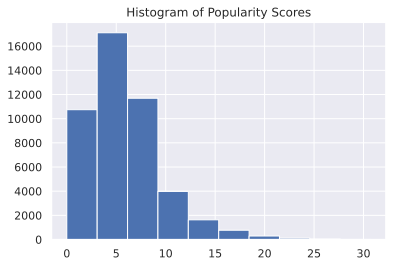

In [210]:
n = plt.hist(df_users['popularity'])
bins = n[1]
plt.title('Histogram of Popularity Scores')
plt.show()

In [168]:
'''Extracting the label distribution for users falling in the specified bin'''
def popularity_label_dist(value_1, value_2):
    label_list = df_users[(df_users['popularity']>=value_1) & (df_users['popularity']<value_2)]['labels']
    label_counter = Counter([item for x in label_list for item in x])
    sum_val = sum(label_counter.values())
    for la in label_counter.keys():
        label_counter[la] = np.round(label_counter[la]/sum_val,2)
    return label_counter

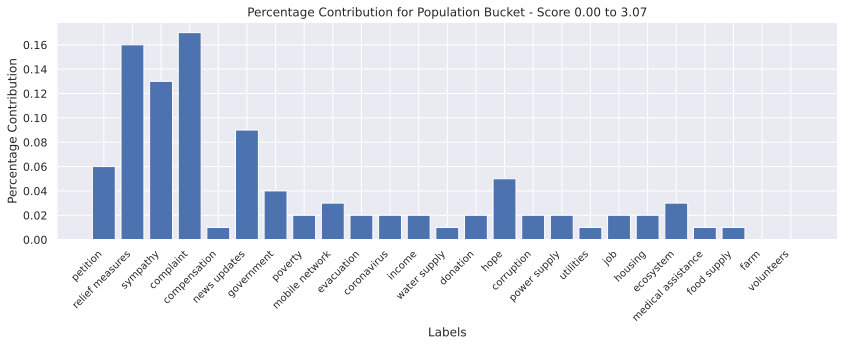

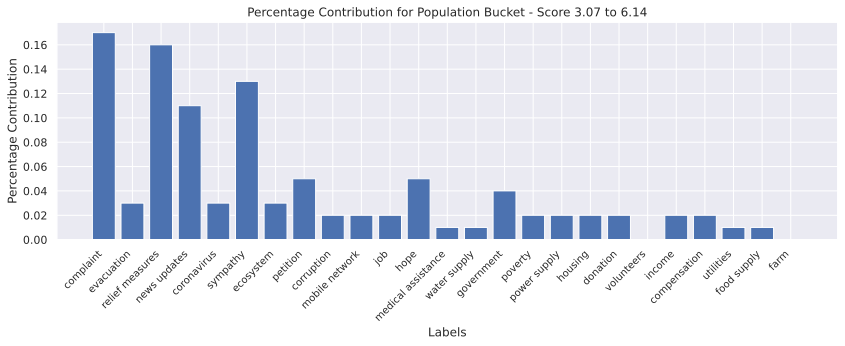

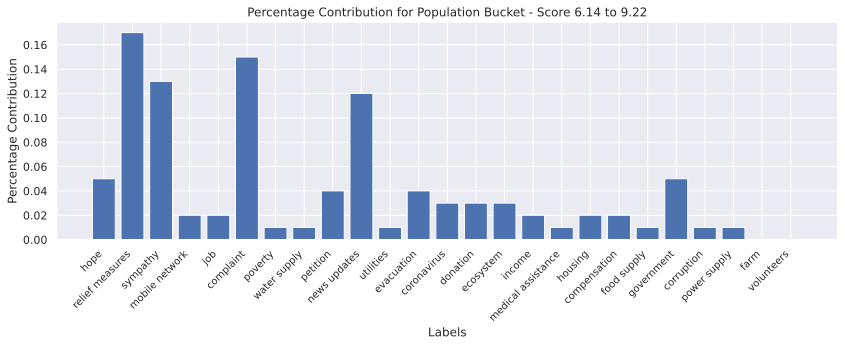

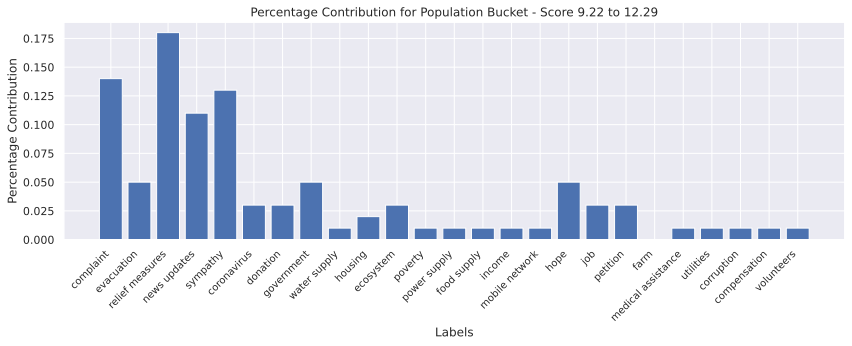

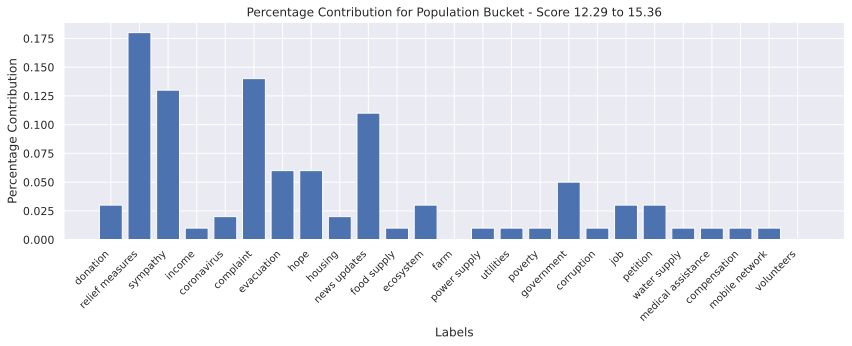

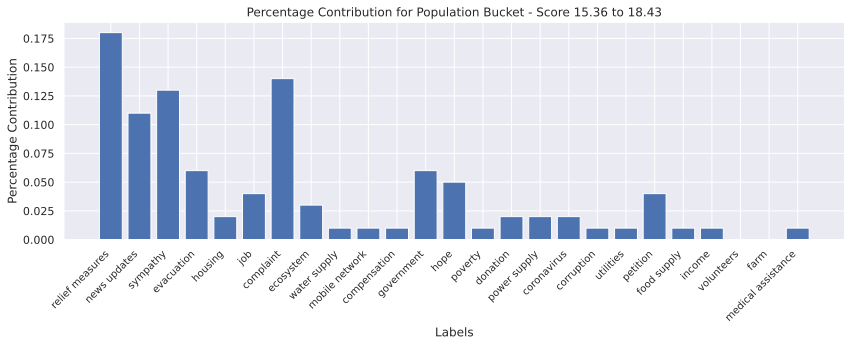

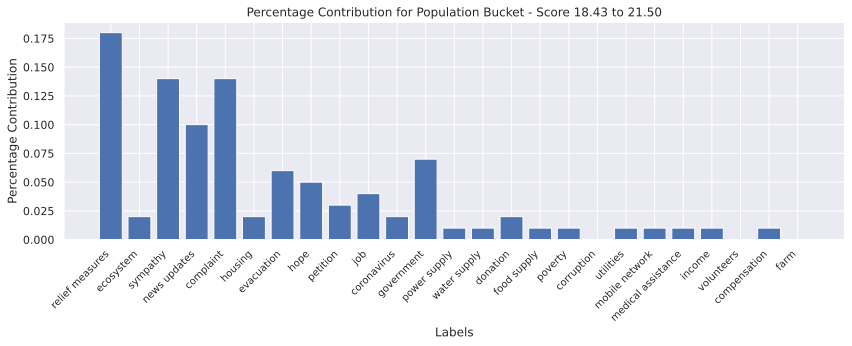

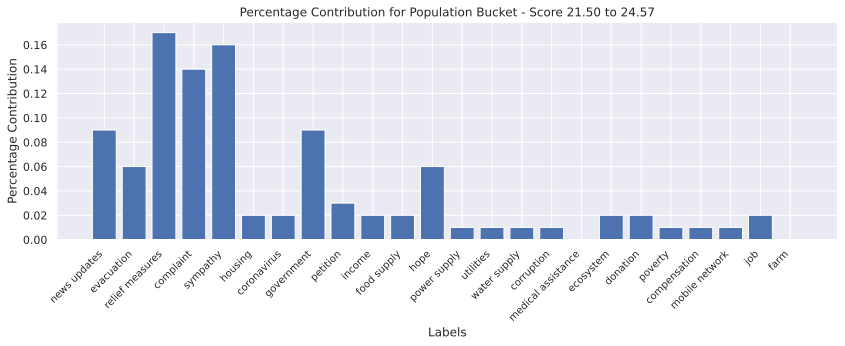

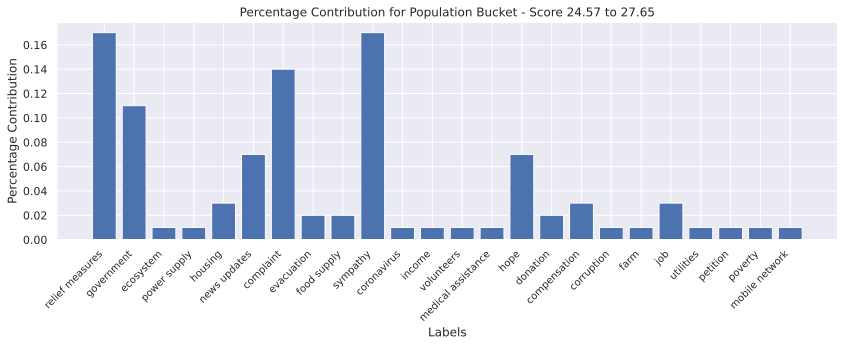

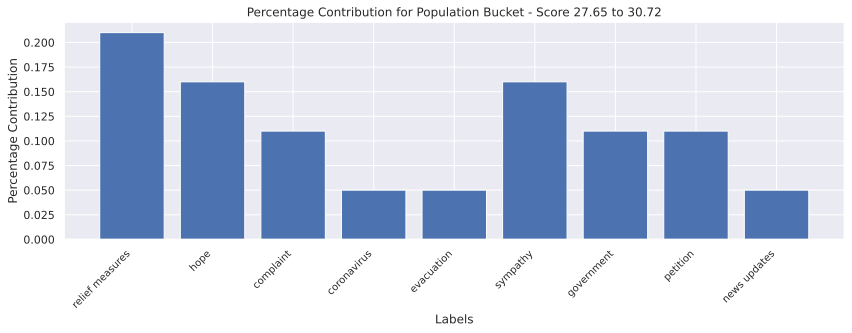

In [209]:
title = 'Percentage Contribution for Population Bucket - Score {bin_1:.2f} to {bin_2:.2f}'
for x in range(len(bins)-1):
    label_dist = popularity_label_dist(bins[x], bins[x+1])
    plt.figure(figsize=(14,4))
    plt.bar(height=list(label_dist.values()), x=list(label_dist.keys()))
    plt.xticks(rotation=45, horizontalalignment='right', fontsize='small')
    plt.xlabel('Labels')
    plt.ylabel('Percentage Contribution')
    plt.title(title.format(bin_1=bins[x], bin_2=bins[x+1]))
    plt.show()